In [1]:
import numpy as np
import pandas as pd

In [2]:
# import dataframe
op_cust_merged = pd.read_pickle(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/02 Data/Prepared Data/orders_products_customers_merged.pkl')

In [3]:
op_cust_merged.head()

order_id  user_id  product_id product_name  prices    busiest_days  \
0   2539329        1         196         Soda     9.0  Regularly busy   
1   2398795        1         196         Soda     9.0      Least busy   
2    473747        1         196         Soda     9.0      Least busy   
3   2254736        1         196         Soda     9.0      Least busy   
4    431534        1         196         Soda     9.0      Least busy   

   loyalty_flag  user_purchased_mean spender_flag  median_days_spo  \
0  New customer             6.367797  Low spender             20.5   
1  New customer             6.367797  Low spender             20.5   
2  New customer             6.367797  Low spender             20.5   
3  New customer             6.367797  Low spender             20.5   
4  New customer             6.367797  Low spender             20.5   

          order_frq_flag  gender    state  age  n_dependants fam_status  \
0  Non-frequent customer  Female  Alabama   31             3    married   
1  Non-frequent customer  Female  Alabama   31             3    married   
2  Non-frequent customer  Female  Alabama   31             3    married   
3  Non-frequent customer  Female  Alabama   31             3    married   
4  Non-frequent customer  Female  Alabama   31             3    married   

   income _merge  
0   40423   both  
1   40423   both  
2   40423   both  
3   40423   both  
4   40423   both

In [4]:
op_cust_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 18 columns):
 #   Column               Dtype   
---  ------               -----   
 0   order_id             int64   
 1   user_id              int64   
 2   product_id           int64   
 3   product_name         object  
 4   prices               float64 
 5   busiest_days         object  
 6   loyalty_flag         object  
 7   user_purchased_mean  float64 
 8   spender_flag         object  
 9   median_days_spo      float64 
 10  order_frq_flag       object  
 11  gender               object  
 12  state                object  
 13  age                  int64   
 14  n_dependants         int64   
 15  fam_status           object  
 16  income               int64   
 17  _merge               category
dtypes: category(1), float64(3), int64(6), object(8)
memory usage: 4.4+ GB


# Qustion 1: The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [5]:
op_cust_merged['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [6]:
# create a new column - region.
op_cust_merged.loc[op_cust_merged['state'].isin(['Maine','New Hampshire', 'Vermont', 'Massachusetts',
                                               'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania',
                                               'New Jersey']), 'region'] = 'Northeast'

In [7]:
op_cust_merged.loc[op_cust_merged['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana',
                                                'Ohio', 'North Dakota', 'South Dakota', 'Nebraska',
                                                'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

In [8]:
op_cust_merged.loc[op_cust_merged['state'].isin(['Delaware', 'Maryland', 'District of Columbia',
                                                'Virginia', 'West Virginia', 'South Carolina',
                                                 'North Carolina', 'Georgia', 'Florida', 'Kentucky',
                                                'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma',
                                                'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'

In [9]:
op_cust_merged.loc[op_cust_merged['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah',
                                                'Colorado', 'Arizona', 'New Mexico', 'Alaska',
                                                'Washington', 'Oregon', 'California', 'Hawaii']),
                  'region'] = 'West'

In [10]:
op_cust_merged['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [11]:
# creat a crosstab between region and spender_flag.
crosstab = pd.crosstab(op_cust_merged['region'], op_cust_merged['spender_flag'], dropna = False)

In [12]:
crosstab

spender_flag  High spender  Low spender
region                                 
Midwest             155975      7441350
Northeast           108225      5614511
South               209691     10582194
West                160354      8132559

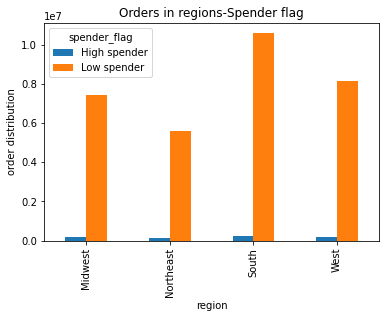

In [28]:
bar_reg = crosstab.plot.bar(ylabel='order distribution', title='Orders in regions-Spender flag')

In [29]:
bar_reg.figure.savefig(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/04 Analysis/Vis/bar_reg_spender.png', bbox_inches='tight')

In [13]:
# creat a crosstab between region and loyalty_flag.
crosstab_1 = pd.crosstab(op_cust_merged['region'], op_cust_merged['loyalty_flag'], dropna = False)

In [14]:
crosstab_1

loyalty_flag  Loyal customer  New customer  Regular customer
region                                                      
Midwest              2373774       1472573           3750978
Northeast            1841785       1100207           2780744
South                3405844       2074410           5311631
West                 2662690       1596800           4033423

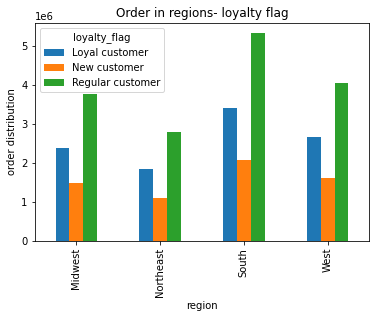

In [26]:
bar_reg_1 = crosstab_1.plot.bar(ylabel='order distribution', title='Order in regions- loyalty flag')

In [27]:
bar_reg_1.figure.savefig(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/04 Analysis/Vis/bar_reg_loy.png', bbox_inches='tight')

In [15]:
# creat a crosstab between region and order_frq_flag.
crosstab_2 = pd.crosstab(op_cust_merged['region'], op_cust_merged['order_frq_flag'], dropna = False)

In [16]:
crosstab_2

order_frq_flag  Frequent customer  Non-frequent customer  Regular customer
region                                                                    
Midwest                   5017709                 863419           1716197
Northeast                 3804566                 630182           1287988
South                     7192372                1215088           2384420
West                      5545206                 927748           1819959

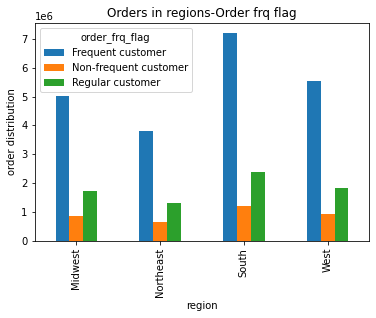

In [30]:
bar_reg_2 = crosstab_2.plot.bar(ylabel='order distribution', title='Orders in regions-Order frq flag')

In [31]:
bar_reg_2.figure.savefig(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/04 Analysis/Vis/bar_reg_frq.png', bbox_inches='tight')

In [18]:
op_cust_merged.groupby(['region'])['prices'].mean()

region
Midwest      7.792584
Northeast    7.782409
South        7.794918
West         7.790355
Name: prices, dtype: float64

In [17]:
# export the df
op_cust_merged.to_pickle(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/02 Data/Prepared Data/orders_products_customers_merged.pkl')

# Question 2: The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [13]:
# import 2 dataframes -- orders_products_merged_inner_4.9.pkl & customers_wrangled_clean.csv
op_merged = pd.read_pickle(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/02 Data/Prepared Data/orders_products_merged_inner_4.9.pkl')

In [14]:
op_merged.head()

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  ...    price_range_loc     busiest_day    busiest_days  \
0         Soda  ...  Mid_range rpoduct  Regularly busy  Regularly busy   
1         Soda  ...  Mid_range rpoduct  Regularly busy      Least busy   
2         Soda  ...  Mid_range rpoduct  Regularly busy      Least busy   
3         Soda  ...  Mid_range rpoduct      Least busy      Least busy   
4         Soda  ...  Mid_range rpoduct      Least busy      Least busy   

  busiest_period_of_day max_number  loyalty_flag user_purchased_mean  \
0        Average orders         10  New customer            6.367797   
1        Average orders         10  New customer            6.367797   
2           Most orders         10  New customer            6.367797   
3        Average orders         10  New customer            6.367797   
4           Most orders         10  New customer            6.367797   

   spender_flag median_days_spo         order_frq_flag  
0   Low spender            20.5  Non-frequent customer  
1   Low spender            20.5  Non-frequent customer  
2   Low spender            20.5  Non-frequent customer  
3   Low spender            20.5  Non-frequent customer  
4   Low spender            20.5  Non-frequent customer  

[5 rows x 23 columns]

In [15]:
op_merged_act = op_merged[op_merged['max_number'] >= 5]

In [16]:
op_merged_act.shape

(30964564, 23)

In [17]:
op_merged.shape

(32404859, 23)

In [18]:
op_merged_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404858
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_number              int64  
 18  loyalty_flag            object 
 19  user_purchased_mean     float64
 20  spender_flag            object 
 21  median_days_spo         float

In [19]:
op_merged_act.describe()

order_id       user_id  order_number     order_dow  \
count  3.096456e+07  3.096456e+07  3.096456e+07  3.096456e+07   
mean   1.710317e+06  1.029284e+05  1.783414e+01  2.741397e+00   
std    9.873785e+05  5.947061e+04  1.763442e+01  2.089254e+00   
min    2.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.554120e+05  5.140900e+04  5.000000e+00  1.000000e+00   
50%    1.710404e+06  1.025860e+05  1.200000e+01  3.000000e+00   
75%    2.565206e+06  1.543870e+05  2.500000e+01  5.000000e+00   
max    3.421083e+06  2.062090e+05  9.900000e+01  6.000000e+00   

       order_hour_of_day  days_since_prior_order    product_id  \
count       3.096456e+07            2.930328e+07  3.096456e+07   
mean        1.341098e+01            1.081030e+01  2.559850e+04   
std         4.248845e+00            8.578590e+00  1.408096e+04   
min         0.000000e+00            0.000000e+00  1.000000e+00   
25%         1.000000e+01            5.000000e+00  1.354400e+04   
50%         1.300000e+01            7.000000e+00  2.528800e+04   
75%         1.600000e+01            1.400000e+01  3.794700e+04   
max         2.300000e+01            3.000000e+01  4.968800e+04   

       add_to_cart_order     reordered      aisle_id  department_id  \
count       3.096456e+07  3.096456e+07  3.096456e+07   3.096456e+07   
mean        8.363038e+00  6.061019e-01  7.118859e+01   9.922365e+00   
std         7.135399e+00  4.886127e-01  3.822194e+01   6.282441e+00   
min         1.000000e+00  0.000000e+00  1.000000e+00   1.000000e+00   
25%         3.000000e+00  0.000000e+00  3.100000e+01   4.000000e+00   
50%         6.000000e+00  1.000000e+00  8.300000e+01   9.000000e+00   
75%         1.100000e+01  1.000000e+00  1.070000e+02   1.600000e+01   
max         1.450000e+02  1.000000e+00  1.340000e+02   2.100000e+01   

             prices    max_number  user_purchased_mean  median_days_spo  
count  3.095969e+07  3.096456e+07         3.096456e+07     3.096456e+07  
mean   7.790590e+00  3.442569e+01         1.193352e+01     9.957140e+00  
std    4.240595e+00  2.489504e+01         7.992284e+01     6.666137e+00  
min    1.000000e+00  5.000000e+00         1.000000e+00     0.000000e+00  
25%    4.200000e+00  1.400000e+01         7.392889e+00     6.000000e+00  
50%    7.400000e+00  2.800000e+01         7.825143e+00     7.000000e+00  
75%    1.130000e+01  4.800000e+01         8.249596e+00     1.250000e+01  
max    2.500000e+01  9.900000e+01         1.500694e+04     3.000000e+01

In [20]:
# export the dataframe to folder -- Prepared Data
op_merged_act.to_pickle(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/02 Data/Prepared Data/orders_products_high_act_customer.pkl')

# Question 3: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [21]:
# import customer dataframe
cust = pd.read_csv(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/02 Data/Prepared Data/customers_wrangled_clean.csv')

In [22]:
cust.head()

Unnamed: 0  user_id  gender       state  age  n_dependants fam_status  \
0           0    26711  Female    Missouri   48             3    married   
1           1    33890  Female  New Mexico   36             0     single   
2           2    65803    Male       Idaho   35             2    married   
3           3   125935  Female        Iowa   40             0     single   
4           4   130797  Female    Maryland   26             1    married   

   income  
0  165665  
1   59285  
2   99568  
3   42049  
4   40374

In [23]:
# pick relative columns from op_merged df.
op_merged_pick = op_merged[['order_id', 'user_id', 'product_id', 'product_name',
                           'department_id', 'prices', 'order_dow', 'order_hour_of_day',
                          'max_number', 'user_purchased_mean', 'median_days_spo']]

In [24]:
# merge order_products dataframe with customer dataframe
cust_prof = op_merged_pick.merge(cust, on = ['user_id'], indicator = False)

In [25]:
# check the dataframe
cust_prof.head(10)

order_id  user_id  product_id product_name  department_id  prices  \
0   2539329        1         196         Soda              7     9.0   
1   2398795        1         196         Soda              7     9.0   
2    473747        1         196         Soda              7     9.0   
3   2254736        1         196         Soda              7     9.0   
4    431534        1         196         Soda              7     9.0   
5   3367565        1         196         Soda              7     9.0   
6    550135        1         196         Soda              7     9.0   
7   3108588        1         196         Soda              7     9.0   
8   2295261        1         196         Soda              7     9.0   
9   2550362        1         196         Soda              7     9.0   

   order_dow  order_hour_of_day  max_number  user_purchased_mean  \
0          2                  8          10             6.367797   
1          3                  7          10             6.367797   
2          3                 12          10             6.367797   
3          4                  7          10             6.367797   
4          4                 15          10             6.367797   
5          2                  7          10             6.367797   
6          1                  9          10             6.367797   
7          1                 14          10             6.367797   
8          1                 16          10             6.367797   
9          4                  8          10             6.367797   

   median_days_spo  Unnamed: 0  gender    state  age  n_dependants fam_status  \
0             20.5      134862  Female  Alabama   31             3    married   
1             20.5      134862  Female  Alabama   31             3    married   
2             20.5      134862  Female  Alabama   31             3    married   
3             20.5      134862  Female  Alabama   31             3    married   
4             20.5      134862  Female  Alabama   31             3    married   
5             20.5      134862  Female  Alabama   31             3    married   
6             20.5      134862  Female  Alabama   31             3    married   
7             20.5      134862  Female  Alabama   31             3    married   
8             20.5      134862  Female  Alabama   31             3    married   
9             20.5      134862  Female  Alabama   31             3    married   

   income  
0   40423  
1   40423  
2   40423  
3   40423  
4   40423  
5   40423  
6   40423  
7   40423  
8   40423  
9   40423

In [26]:
# drop ['Unnamed:0'] column
cust_prof = cust_prof.drop(columns = ['Unnamed: 0'])

In [27]:
cust_prof.columns

Index(['order_id', 'user_id', 'product_id', 'product_name', 'department_id',
       'prices', 'order_dow', 'order_hour_of_day', 'max_number',
       'user_purchased_mean', 'median_days_spo', 'gender', 'state', 'age',
       'n_dependants', 'fam_status', 'income'],
      dtype='object')

In [28]:
cust['fam_status'].value_counts()

married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: fam_status, dtype: int64

In [29]:
# create a crosstable between fam_status and n_dependants to see how to devide groups.
crosstab = pd.crosstab(cust['fam_status'], cust['n_dependants'], dropna = False)

In [30]:
crosstab.to_clipboard()

In [31]:
# create a crosstable between fam_status and department_id to see how to devide groups.
crosstab_1 = pd.crosstab(cust_prof['fam_status'], cust_prof['department_id'], dropna = False)

In [32]:
crosstab_1.to_clipboard()

In [33]:
# according to age, income, family status and certain goods, customers are devided into four groups: junior single, senior single, young parent, family without babies.
# derive new column -- customer_profile
cust_prof.loc[(cust_prof['n_dependants'] == 0)&(cust_prof['age'] < 40), 'customer_profile'] = 'junior single'

In [34]:
cust_prof.loc[(cust_prof['n_dependants'] == 0)&(cust_prof['age'] >= 40), 'customer_profile'] = 'senior single'

In [35]:
cust_prof.loc[(cust_prof['department_id'] == 18)&(cust_prof['fam_status'] == 'married'), 'customer_profile'] = 'young parent'

In [36]:
# create a subset about young parent, mark these user_ids as 'young parent'.
cust_prof_yp_usid = cust_prof[cust_prof['customer_profile'] == 'young parent']['user_id']

In [37]:
cust_prof_yp_usid.value_counts()

84092     546
124042    451
169991    377
197502    369
108736    354
         ... 
201574      1
200940      1
124074      1
124158      1
109         1
Name: user_id, Length: 23727, dtype: int64

In [38]:
cust_prof_yp_usid.shape

(297162,)

In [39]:
# drop duplicates
cust_prof_yp_usid = cust_prof_yp_usid.drop_duplicates()

In [40]:
cust_prof_yp_usid.shape

(23727,)

In [41]:
cust_prof_yp_usid.tolist()

[109,
 290,
 420,
 778,
 1613,
 3531,
 4972,
 6460,
 6502,
 6773,
 6908,
 7407,
 7430,
 7683,
 7730,
 7810,
 8232,
 8396,
 8492,
 9364,
 9938,
 10200,
 10267,
 10461,
 11749,
 13028,
 14537,
 14566,
 14636,
 15954,
 16116,
 16407,
 16517,
 16520,
 16882,
 17294,
 17430,
 17703,
 18293,
 19778,
 20659,
 20727,
 20923,
 21105,
 21266,
 22269,
 22335,
 22905,
 23465,
 24316,
 24521,
 25776,
 26004,
 26140,
 26216,
 26269,
 26603,
 27348,
 27502,
 27633,
 27838,
 28261,
 28668,
 28852,
 28858,
 29217,
 30223,
 30548,
 31094,
 31355,
 32334,
 32624,
 33061,
 33217,
 33798,
 34287,
 34535,
 34713,
 35095,
 35524,
 35573,
 36292,
 36454,
 36795,
 36861,
 37124,
 37422,
 39822,
 39828,
 39983,
 40271,
 40298,
 40703,
 40796,
 41186,
 41244,
 41855,
 42177,
 42889,
 43265,
 43508,
 43736,
 43945,
 44259,
 44629,
 44763,
 44924,
 44927,
 45910,
 46103,
 46485,
 46816,
 47104,
 47326,
 47727,
 48301,
 48623,
 48835,
 48846,
 49061,
 50060,
 50133,
 50386,
 50893,
 51825,
 52868,
 53663,
 54006,
 

In [42]:
# mark these users as 'young parent' on cust_prof df
cust_prof.loc[cust_prof['user_id'].isin(cust_prof_yp_usid.tolist()), 'customer_profile'] = 'young parent'

In [43]:
cust_prof_yp_usid_1 = cust_prof[cust_prof['customer_profile'] == 'young parent']

In [44]:
cust_prof_yp_usid_1['user_id'].value_counts()

182401    2906
137629    2901
108187    2724
60694     2577
52008     2386
          ... 
117304       5
21531        4
78021        4
93363        3
116517       3
Name: user_id, Length: 23727, dtype: int64

Length of distinct cust_prof_yp_usid_1['user_id'] matches length of distinct user_id of cust_prof_yp_usid, which means 'young parent' profile was ALL marked. 

In [45]:
# continue to finish the customer profile
cust_prof.loc[cust_prof['customer_profile'].isnull(), 'customer_profile'] = 'family without babies'

In [46]:
cust_prof['customer_profile'].value_counts(dropna = False)

family without babies    17302426
young parent              7004930
senior single             5315673
junior single             2781830
Name: customer_profile, dtype: int64

# Question 4: Create an appropriate visualization to show the distribution of profiles.

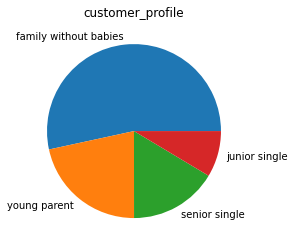

In [47]:
# create a pie chart with customer_profile data.
pie = cust_prof['customer_profile'].value_counts().plot.pie(ylabel = '', title = 'customer_profile')

In [48]:
# export the chart
pie.figure.savefig(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/04 Analysis/Vis/pie_cust_prof.png')

# Question 5: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [49]:
cust_prof.groupby(['customer_profile']).agg({'max_number':['max','mean','min']})

max_number               
                             max       mean min
customer_profile                               
family without babies         99  29.606682   1
junior single                 99  32.969530   3
senior single                 99  33.471646   2
young parent                  99  41.277136   3

In [50]:
cust_prof.groupby(['customer_profile']).agg({'median_days_spo':['max','mean','min']})

median_days_spo                
                                  max       mean  min
customer_profile                                     
family without babies            30.0  11.177842  0.0
junior single                    30.0  10.472940  0.0
senior single                    30.0  10.312423  0.0
young parent                     30.0   8.505829  0.0

In [51]:
cust_prof.groupby(['customer_profile']).agg({'user_purchased_mean':['max','mean','min']})

user_purchased_mean                  
                                      max       mean    min
customer_profile                                           
family without babies        12506.925000  12.273977  1.000
junior single                 8794.882427  11.864935  1.000
senior single                25005.425000  12.267562  1.000
young parent                  4768.028571  11.082390  1.425

In [52]:
cust_prof.groupby(['customer_profile']).agg({'prices':['sum']})

prices
                               sum
customer_profile                  
family without babies  134505853.1
junior single           21638298.4
senior single           41431477.7
young parent            54850491.4

# Question 6: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [53]:
# create a new column -- region in cust_prof df.
cust_prof.loc[cust_prof['state'].isin(['Maine','New Hampshire', 'Vermont', 'Massachusetts',
                                               'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania',
                                               'New Jersey']), 'region'] = 'Northeast'

In [54]:
cust_prof.loc[cust_prof['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana',
                                                'Ohio', 'North Dakota', 'South Dakota', 'Nebraska',
                                                'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

In [55]:
cust_prof.loc[cust_prof['state'].isin(['Delaware', 'Maryland', 'District of Columbia',
                                                'Virginia', 'West Virginia', 'South Carolina',
                                                 'North Carolina', 'Georgia', 'Florida', 'Kentucky',
                                                'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma',
                                                'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'

In [56]:
cust_prof.loc[cust_prof['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah',
                                                'Colorado', 'Arizona', 'New Mexico', 'Alaska',
                                                'Washington', 'Oregon', 'California', 'Hawaii']),
                  'region'] = 'West'

In [57]:
cust_prof['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [58]:
cust_prof.head()

order_id  user_id  product_id product_name  department_id  prices  \
0   2539329        1         196         Soda              7     9.0   
1   2398795        1         196         Soda              7     9.0   
2    473747        1         196         Soda              7     9.0   
3   2254736        1         196         Soda              7     9.0   
4    431534        1         196         Soda              7     9.0   

   order_dow  order_hour_of_day  max_number  user_purchased_mean  \
0          2                  8          10             6.367797   
1          3                  7          10             6.367797   
2          3                 12          10             6.367797   
3          4                  7          10             6.367797   
4          4                 15          10             6.367797   

   median_days_spo  gender    state  age  n_dependants fam_status  income  \
0             20.5  Female  Alabama   31             3    married   40423   
1             20.5  Female  Alabama   31             3    married   40423   
2             20.5  Female  Alabama   31             3    married   40423   
3             20.5  Female  Alabama   31             3    married   40423   
4             20.5  Female  Alabama   31             3    married   40423   

        customer_profile region  
0  family without babies  South  
1  family without babies  South  
2  family without babies  South  
3  family without babies  South  
4  family without babies  South

In [59]:
# create four subsetting df in different customer profiles.
cust_prof_fam_no_bb = cust_prof[cust_prof['customer_profile'] == 'family without babies']

In [60]:
cust_prof_jun_sing = cust_prof[cust_prof['customer_profile'] == 'junior single']

In [61]:
cust_prof_sen_sing = cust_prof[cust_prof['customer_profile'] == 'senior single']

In [62]:
cust_prof_youn_par = cust_prof[cust_prof['customer_profile'] == 'young parent']

In [63]:
# create crosstables comparing regions and departments in these four subsetting df.
crosstab_fam_no_bb = pd.crosstab(cust_prof_fam_no_bb['department_id'], cust_prof_fam_no_bb['region'], dropna = False)

In [64]:
crosstab_jun_sing = pd.crosstab(cust_prof_jun_sing['department_id'], cust_prof_jun_sing['region'], dropna = False)

In [65]:
crosstab_sen_sing = pd.crosstab(cust_prof_sen_sing['department_id'], cust_prof_sen_sing['region'], dropna = False)

In [66]:
crosstab_youn_par = pd.crosstab(cust_prof_youn_par['department_id'], cust_prof_youn_par['region'], dropna = False)

In [74]:
crosstab_fam_no_bb

region         Midwest  Northeast    South     West
department_id                                      
1               279023     207812   396626   305008
2                 4556       3345     6369     4846
3               144709     108546   205246   159984
4              1207333     897363  1708719  1302683
5                22530      16498    34904    26523
6                35048      25455    49203    38105
7               361851     278535   515410   394168
8                13220       9899    18269    15295
9               104701      76913   147205   114112
10                4599       3205     6308     5116
11               56254      41159    79050    59378
12               89622      67010   128138    97612
13              243819     180920   343163   264712
14               88273      66146   125989    97533
15              136340     100042   191066   147282
16              658775     499022   935862   725422
17               95077      71148   131307   101917
18                5227       3281     6860     4778
19              371430     283880   524729   413352
20              132825     100988   189849   146780
21                8969       6610    12163     9427

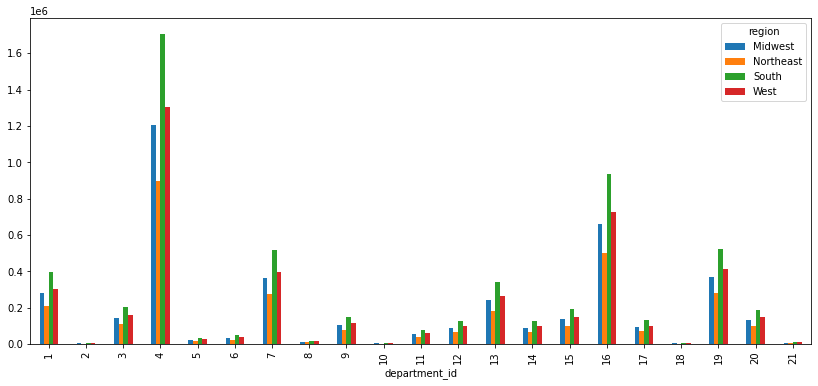

In [79]:
# create bar charts for the four groups, and save them in Vis folder.
bar_reg_dep_fam_no_bb = crosstab_fam_no_bb.plot.bar(figsize = (14,6))

In [80]:
bar_reg_dep_fam_no_bb.figure.savefig(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/04 Analysis/Vis/bar_reg_dep_fam_no_bb.png')

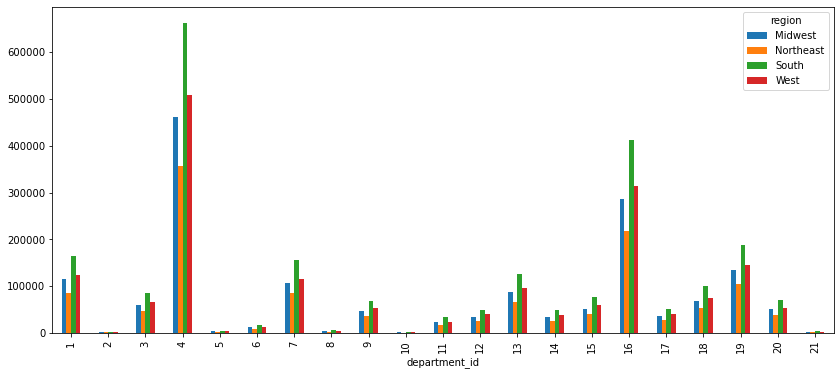

In [81]:
bar_reg_dep_youn_par = crosstab_youn_par.plot.bar(figsize = (14,6))

In [82]:
bar_reg_dep_youn_par.figure.savefig(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/04 Analysis/Vis/bar_reg_dep_youn_par.png')

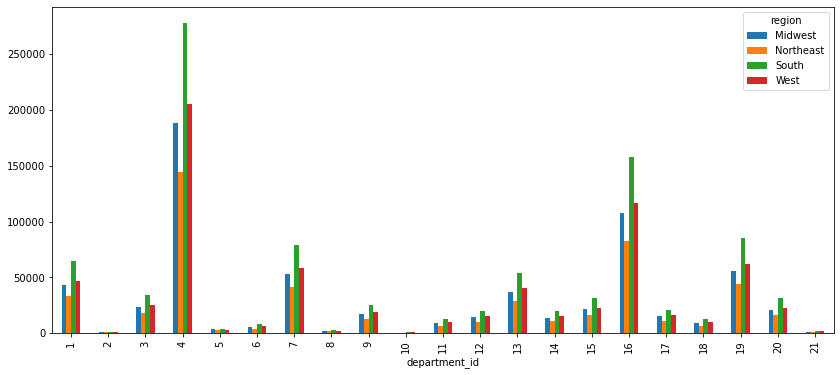

In [83]:
bar_reg_dep_jun_sing = crosstab_jun_sing.plot.bar(figsize = (14,6))

In [84]:
bar_reg_dep_jun_sing.figure.savefig(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/04 Analysis/Vis/bar_reg_dep_jun_sing.png')

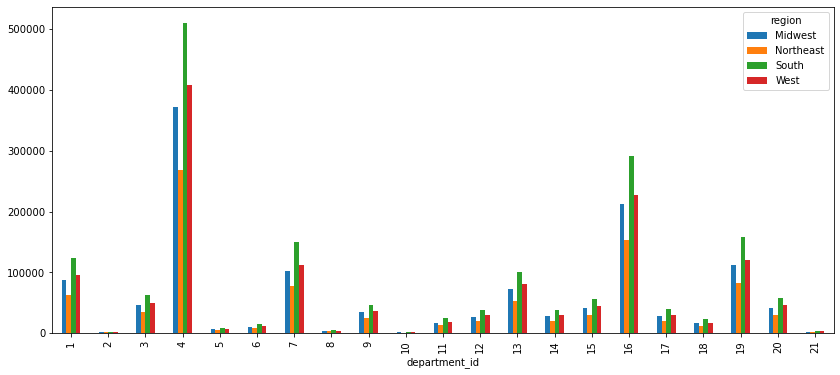

In [85]:
bar_reg_dep_sen_sing = crosstab_sen_sing.plot.bar(figsize = (14,6))

In [86]:
bar_reg_dep_sen_sing.figure.savefig(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/04 Analysis/Vis/bar_reg_dep_sen_sing.png')

In [87]:
# export cust_prof df
cust_prof.to_pickle(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/02 Data/Prepared Data/customer_profile.pkl')